In [1]:
import numpy as np, pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
DrawingOptions.bondLineWidth=1.8
from rdkit.Chem.rdmolops import SanitizeFlags
from IPython.display import SVG

# https://github.com/jensengroup/xyz2mol
from xyz2mol import xyz2mol, xyz2AC, AC2mol, read_xyz_file
from pathlib import Path
import pickle
from cairosvg import svg2png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

In [3]:
with open('I:/Molecule_Kaggle/mols/mols.pkl', 'rb') as f:
    mols = pickle.load(f)

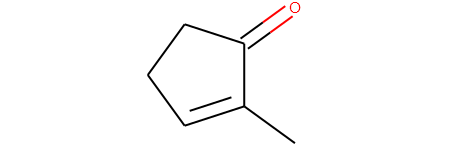

In [4]:
m = mols['dsgdb9nsd_002129']
m_2d = Chem.MolFromSmiles(Chem.MolToSmiles(m)); m_2d

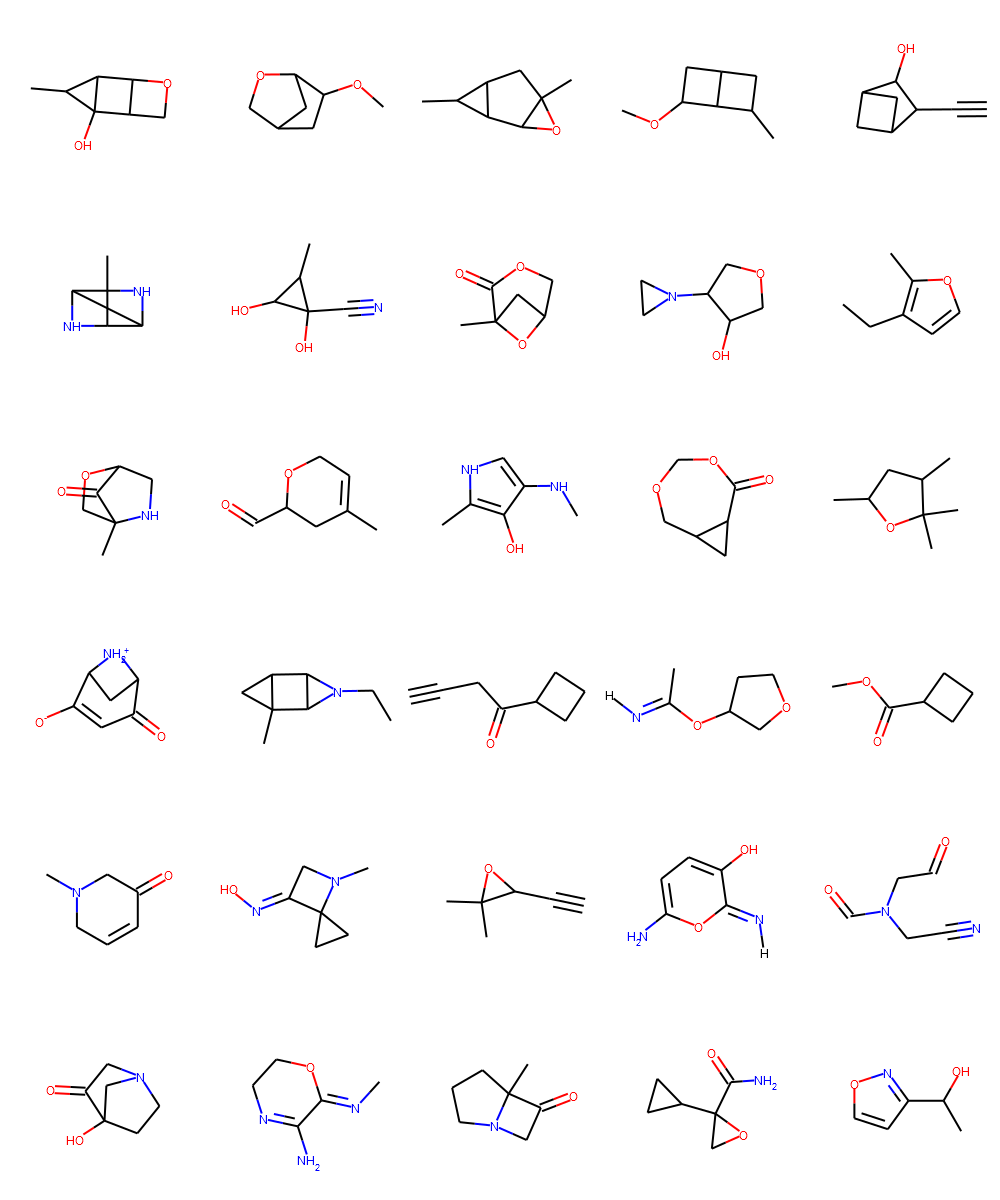

In [4]:
# 9 random molecules using rdkit grid
names = np.random.choice(list(mols.keys()), 30)
Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(mols[_])) for _ in names], molsPerRow=5)

In [4]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
structure = pd.read_csv('input/structures.csv')

In [8]:
all_train_molecules = pd.unique(train.molecule_name)
all_test_molecules = pd.unique(test.molecule_name)

In [14]:
all_train_molecules[0]

'dsgdb9nsd_000001'

In [20]:
# highlight the bond given in train/test
# http://rdkit.blogspot.com/2015/02/new-drawing-code.html
for molecule in tqdm(all_test_molecules): #= 'dsgdb9nsd_059826'
    #molecule = 'dsgdb9nsd_059826'
    m = mols[molecule]
#     atom_index_0 = int(train[train.molecule_name == molecule].iloc[0].atom_index_0)
#     atom_index_1 = int(train[train.molecule_name == molecule].iloc[0].atom_index_1)
#     highlight = [atom_index_0, atom_index_1]

    Chem.rdDepictor.Compute2DCoords(m)
    drawer = Draw.rdMolDraw2D.MolDraw2DSVG(600, 300)

    # Replace C, H, O... by atom index
    all_atoms = structure[structure.molecule_name == molecule]
    opts = drawer.drawOptions()
    for i in range(len(all_atoms)): opts.atomLabels[i] = all_atoms.atom.values[i] + str(i)

    # Draw
    drawer.DrawMolecule(m)#,highlightAtoms=highlight, highlightBonds=[], highlightAtomColors={atom_index_0:(0,1,1), atom_index_1:(0,1,1)})
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')
    #SVG(svg)
    
    svg2png(bytestring=svg,write_to='molecule_images/test/'+molecule+'.png')

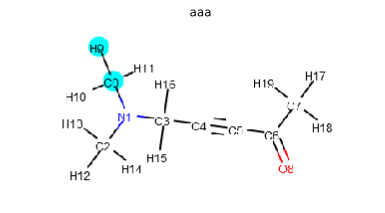

In [130]:
#%config InlineBackend.figure_format = 'svg'
img=mpimg.imread('output.png', format='svg')
plt.imshow(img)
plt.title('aaa')
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')

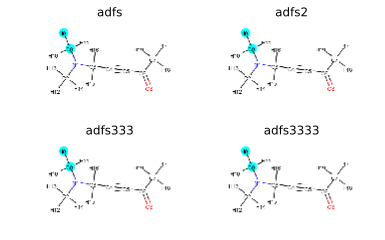

In [138]:
plt.figure(1)
plt.subplot(221)
plt.imshow(img)
plt.axis('off')
plt.title('adfs')

plt.subplot(222)
plt.imshow(img)
plt.axis('off')
plt.title('adfs2')

plt.subplot(223)
plt.imshow(img)
plt.axis('off')
plt.title('adfs333')

plt.subplot(224)
plt.imshow(img)
plt.axis('off')
plt.title('adfs3333')

plt.savefig("test.png", bbox_inches='tight')